# Understanding the dataset
Title: Haberman’s Survival Data
Description: The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago’s Billings Hospital on the survival of patients who had undergone surgery for breast cancer.
Attribute Information:
Age of patient at the time of operation (numerical)
Patient’s year of operation (year — 1900, numerical)
Number of positive axillary nodes detected (numerical)
Survival status (class attribute) :
1 = the patient survived 5 years or longer
2 = the patient died within 5 years

In [2]:
# importing libraries  and 

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns



In [10]:
#Reading dataset and printing first five entry from dataset
dataset = pd.read_csv('E:/python/datascience/iris-dataset-analysis/EDA/haberman.csv')
print(dataset.head())

   Age  year  positive_axillary_nodes  survival_status
0   30    64                        1                1
1   30    62                        3                1
2   30    65                        0                1
3   31    59                        2                1
4   31    65                        4                1


In [5]:
dataset.shape

# The dataset contain 306 rows and 4 columns

(306, 4)

In [6]:
# Printing Columns Name of our dataset
dataset.columns

Index(['Age', 'year', 'positive_axillary_nodes', 'survival_status'], dtype='object')

In [7]:
# printing how many points are present in each survival_status

dataset['survival_status'].value_counts()
 

1    225
2     81
Name: survival_status, dtype: int64

# Observations
 the value count function tells that how many points are present for each class (status)
 here it tells that how many patients survived  then 5 years after operation and how many patients survived less then 5 years.
 Here out of 306 , 255 survived and 81 did not survived.
 The dataset is imbalanced

# Univarient Analysis[PDF and CDF ANALYSIS]

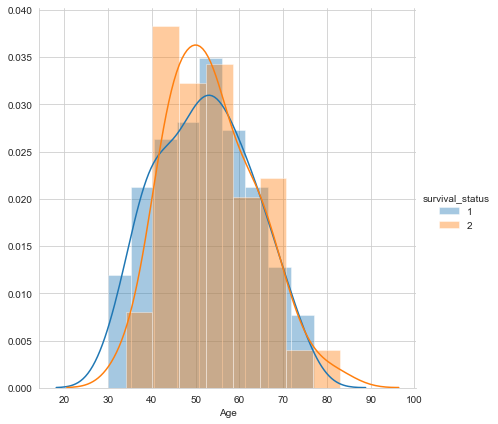

In [4]:
# PDF Analysis
sns.set_style('whitegrid')
sns.FacetGrid(dataset,hue='survival_status',height=6).map(sns.distplot,"Age").add_legend()
plt.show()



# Observations
  Most of the points are overlaping . which tells that survival change of a patient are not depend on the age.  Although due to   overlaping we can say that person whose age are in range of 30-40 have high chance of survival 
  and 40-60 have less chance of survival. person having age in range 60 t0 75 have equal chance of surviving or not surviving.
  It can not be our final conclusion . We can not decide the survival chance of a patient just by considering the age parameter

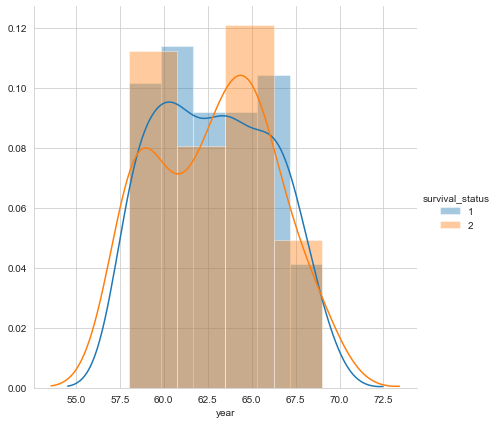

In [5]:
sns.set_style('whitegrid')
sns.FacetGrid(dataset,hue='survival_status',height=6).map(sns.distplot,"year").add_legend()
plt.show()



# Observation
 In this graph also most of the points are overlaping.This graph can only tells that how many operation are successful and 
 how many are unsuccessful.Hence this can not be the parameter to decide the survival change of a patient.
 form this graph we can say the in the range of year 1960 to 1965 most of the operation was unsuccesful.

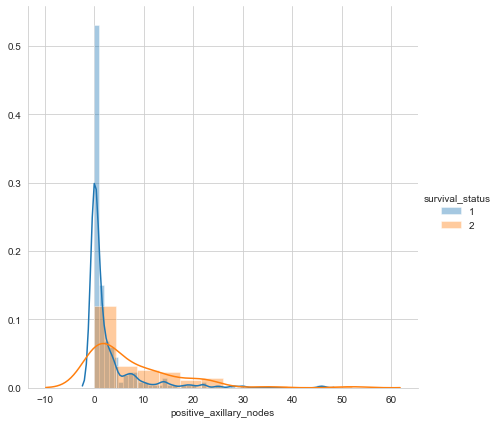

In [6]:
sns.set_style('whitegrid')
sns.FacetGrid(dataset,hue='survival_status',height=6).map(sns.distplot,"positive_axillary_nodes").add_legend()
plt.show()


# Observation
 From this graph we can say that patient having no node or one one have more chances to survive .
 If patient having node greater then 25 ,have very less chance of survival.

# CDF ANALYSIS

# What is CDF ?
It is used to show the probablity of what percentage of points or value are below or eqaul to a value x.

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


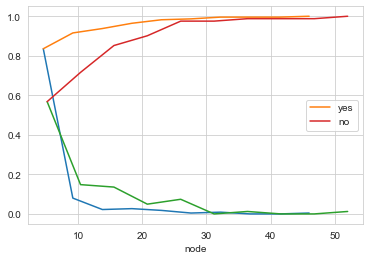

In [80]:
status_yes = dataset.loc[dataset["survival_status"]==1]
status_no = dataset.loc[dataset["survival_status"]==2]
counts,edge = np.histogram(status_yes['positive_axillary_nodes'],bins=10,density=True)

pdf = counts/sum(counts)
print(pdf)
print(edge)
cdf = np.cumsum(pdf)
sns.set_style('whitegrid')
plt.plot(edge[1:],pdf)
plt.plot(edge[1:],cdf,label="yes")
plt.xlabel('node')
print("==============================================")
counts1,edge1 = np.histogram(status_no['positive_axillary_nodes'],bins=10,density=True)
pdf1 = counts1/sum(counts1)
print(pdf1)
print(edge1)
cdf1 = np.cumsum(pdf1)
plt.plot(edge1[1:],pdf1)
plt.plot(edge1[1:],cdf1,label="no")
plt.xlabel('node')
plt.legend()
plt.show()

# observation
 From the cdf graph we can say that 83.55% of patient have survived how has node in range of 0-4.6

# Boxplot
In Boxplot lower line and upper lines indicate the 25th and 75th percientile ,middle line indicate the median value of dataset.
whiskers tells about range of data.Outlier points are those past the end of the whiskers

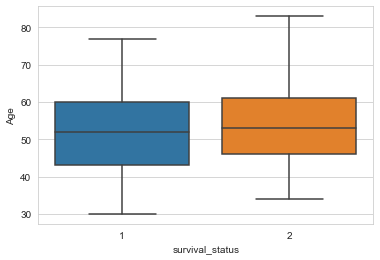

In [53]:
sns.set_style('whitegrid')
sns.boxplot(x="survival_status",y="Age",data=dataset)
plt.show()

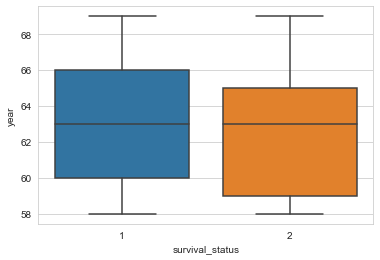

In [52]:
sns.set_style("whitegrid")
sns.boxplot(x="survival_status",y="year",data=dataset)
plt.show()

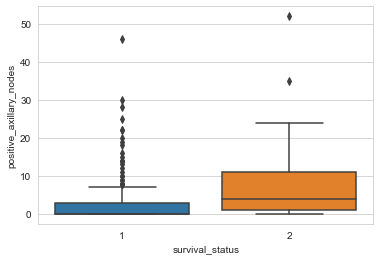

In [55]:
sns.set_style("whitegrid")
sns.boxplot(x="survival_status",y="positive_axillary_nodes",data=dataset)
plt.show()

# Violin plot
It is combination of boxplot and pdf


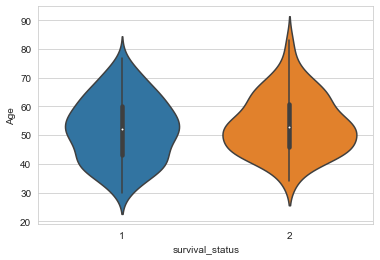

In [58]:
sns.set_style('whitegrid')
sns.violinplot(x="survival_status",y="Age",data=dataset)
plt.show()

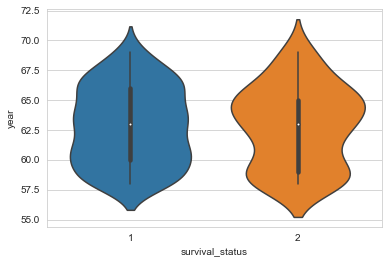

In [60]:
sns.set_style("whitegrid")
sns.violinplot(x="survival_status",y="year",data=dataset)
plt.show()

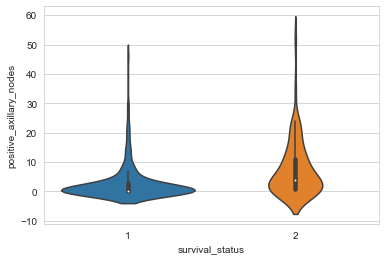

In [63]:
sns.set_style("whitegrid")
sns.violinplot(x="survival_status",y="positive_axillary_nodes",data=dataset)
plt.show()

# Observation